In [1]:
import numpy as np
import matplotlib.pylab as plt

from utils import compute_trajectory, LQR_policy, apply_linear_dynamics

# LQR

## Define system variables A and B; and initial conditions x0

In [2]:
# http://www.argmin.net/2018/02/08/lqr/
m = 1.
A = np.array([[1., 1.],
              [0., 1.]])
B = np.array([[0],
             [1./m]])

# arbitrarily chosen initial conditions
x0 = np.array([[1.],
              [0.]])

## Define cost

In [3]:
# cost = \sum_t (x_t - x_goal)**2 + u_t**2
Q = np.eye(2)
Q_f = np.eye(2) * 1.
R = np.array([[10.]])

R_small = np.array([[0.3]])
Q_f_large = np.eye(2) * 100.

## DP solution

In [4]:
T = 5
policy = LQR_policy(A, B, R, Q, Q_f, T)
policy_small_R = LQR_policy(A, B, R_small, Q, Q_f, T)
policy_large_Q_f = LQR_policy(A, B, R, Q, Q_f_large, T)

x, u = compute_trajectory(A, B, policy, apply_linear_dynamics, x0, T)
x_small_R, u_small_R = compute_trajectory(A, B, policy_small_R, apply_linear_dynamics, x0, T)
x_large_Q_f, u_large_Q_f = compute_trajectory(A, B, policy_large_Q_f, apply_linear_dynamics, x0, T)

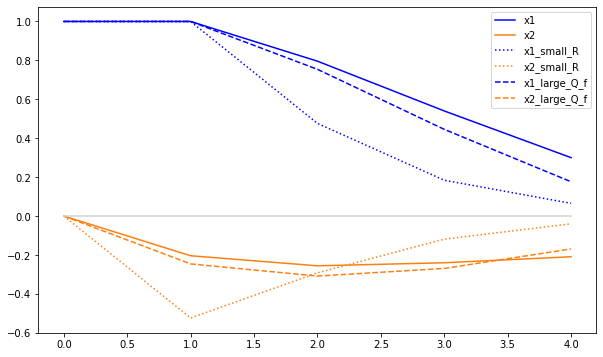

In [6]:
x1 = [x_t[0] for x_t in x]
x2 = [x_t[1] for x_t in x]

x1_small_R = [x_t[0] for x_t in x_small_R]
x2_small_R = [x_t[1] for x_t in x_small_R]

x1_large_Q_f = [x_t[0] for x_t in x_large_Q_f]
x2_large_Q_f = [x_t[1] for x_t in x_large_Q_f]

plt.figure(figsize=[10,6])
plt.plot(x1, '-', color='b')
plt.plot(x2, '-', color='tab:orange')

plt.plot(x1_small_R, ':', color='b')
plt.plot(x2_small_R, ':', color='tab:orange')

plt.plot(x1_large_Q_f, '--', color='b')
plt.plot(x2_large_Q_f, '--', color='tab:orange')
plt.legend(['x1', 'x2', 'x1_small_R', 'x2_small_R', 'x1_large_Q_f', 'x2_large_Q_f'])

plt.plot([0]*T, '-', color='lightgrey')

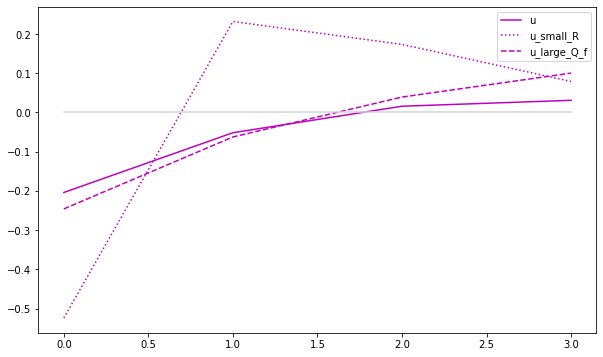

In [9]:
u1 = [u_t[0] for u_t in u]
u1_small_R = [u_t[0] for u_t in u_small_R]
u1_large_Q_f = [u_t[0] for u_t in u_large_Q_f]

plt.figure(figsize=[10,6])
plt.plot(u1, '-', color='m')
plt.plot(u1_small_R, ':', color='m')
plt.plot(u1_large_Q_f, '--', color='m')
plt.legend(['u', 'u_small_R', 'u_large_Q_f'])

plt.plot([0]*(T-1), '-', color='lightgrey')